# Introduction to Portfolio Theory: Risk Measures #

After studying benchmarks, Nancy concluded that she was somewhat fortunate to have chosen Nvidia stock as her first investment. Now, she wants to invest in an ETF because she believes it can help her maintain a medium-to-long-term investment strategy, as she is not ready for daily trading. Nancy wants to be more careful when choosing an ETF, so she compares three ETFs (SPY, IWY, and SPXL) and their risks.

In [2]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Statistics
from scipy.stats import norm

# Import Data
import yfinance as yf

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from functions import import_daily_financial_data

# Visualization
import matplotlib.pyplot as plt

In [33]:
# Import Data
df_1 = import_daily_financial_data(
    ticker='SPY', 
    start_date='2015-01-01', 
    end_date='2025-01-01', 
    returns=True
)

df_1

[*********************100%***********************]  1 of 1 completed


Price            close        high         low        open     volume  \
Date                                                                    
2015-01-05  168.967651  171.187378  168.657731  171.019854  169632600   
2015-01-06  167.376114  169.805249  166.571979  169.277535  209151400   
2015-01-07  169.461823  169.805256  168.264011  168.716328  125346700   
2015-01-08  172.468903  172.686696  170.869031  170.885774  147217800   
2015-01-09  171.086884  172.904549  170.467029  172.887793  158567300   
...                ...         ...         ...         ...        ...   
2024-12-24  599.496582  599.536501  593.684050  594.272307   33160100   
2024-12-26  599.536499  600.673034  596.286267  597.701991   41219100   
2024-12-27  593.225464  595.987176  588.988210  595.747844   64969300   
2024-12-30  586.455811  589.965273  582.657240  586.126844   56578800   
2024-12-31  584.322266  588.868587  582.667210  588.140735   57052700   

Price        returns  
Date                  
2015-01-05 -0.018224  
2015-01-06 -0.009464  
2015-01-07  0.012384  
2015-01-08  0.017589  
2015-01-09 -0.008045  
...              ...  
2024-12-24  0.011054  
2024-12-26  0.000067  
2024-12-27 -0.010582  
2024-12-30 -0.011477  
2024-12-31 -0.003645  

[2515 rows x 6 columns]

In [35]:
# Get more data

# Tech ETF
df_2 = import_daily_financial_data(
    ticker='IWY', 
    start_date='2015-01-01', 
    end_date='2025-01-01', 
    returns=True
)

# SP500 x3
df_3 = import_daily_financial_data(
    ticker='SPXL', 
    start_date='2015-01-01', 
    end_date='2025-01-01', 
    returns=True
)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [36]:
# Create the data we are going to use
data = pd.DataFrame()

data['SPY'] = df_1['returns']
data['IWY'] = df_2['returns']
data['SPXL'] = df_3['returns']

data

SPY       IWY      SPXL
Date                                    
2015-01-05 -0.018224 -0.016821 -0.055120
2015-01-06 -0.009464 -0.009332 -0.027998
2015-01-07  0.012384  0.012760  0.036522
2015-01-08  0.017589  0.018346  0.051831
2015-01-09 -0.008045 -0.007537 -0.025754
...              ...       ...       ...
2024-12-24  0.011054  0.013657  0.030746
2024-12-26  0.000067 -0.001805  0.000055
2024-12-27 -0.010582 -0.014681 -0.032044
2024-12-30 -0.011477 -0.012155 -0.035386
2024-12-31 -0.003645 -0.007917 -0.012020

[2515 rows x 3 columns]

In [37]:
# 1. Annualized Volatility (Standard Deviation)

volatility = data.std() * np.sqrt(252)

print("Annualized Volatility:\n")
print(volatility)

Annualized Volatility:

SPY     0.176793
IWY     0.202666
SPXL    0.536495
dtype: float64


In [38]:
# 1.5 Annualized Variance (Standard Deviation)

variance = data.var() * 252

print("Annualized Variance:\n")
print(variance)

Annualized Variance:

SPY     0.031256
IWY     0.041074
SPXL    0.287827
dtype: float64


In [39]:
# 2. Covariance Matrix
covariance = data.cov() * 252  # Annualized

print("Covariance Matrix:\n")
print(covariance)

Covariance Matrix:

           SPY       IWY      SPXL
SPY   0.031256  0.034056  0.094679
IWY   0.034056  0.041074  0.103067
SPXL  0.094679  0.103067  0.287827


In [40]:
# 3. Correlations
correlations = data.corr()

print("Correlation Matrix:\n")
print(correlations)

Correlation Matrix:

           SPY       IWY      SPXL
SPY   1.000000  0.950480  0.998211
IWY   0.950480  1.000000  0.947923
SPXL  0.998211  0.947923  1.000000


In [41]:
# 4. Value at Risk
confidence_level = 0.95

z_score = norm.ppf(1 - confidence_level)

VaR_95 = data.mean() + z_score * data.std()
VaR_95 = VaR_95 * np.sqrt(252)  # Annualized

print("Annualized Value at Risk (VaR) at 95% confidence level:\n")
print(VaR_95)

Annualized Value at Risk (VaR) at 95% confidence level:

SPY    -0.283083
IWY    -0.322968
SPXL   -0.869034
dtype: float64


In [42]:
# Download the Benchmark
benchmark = import_daily_financial_data(
    ticker='^GSPC', 
    start_date='2015-01-01', 
    end_date='2025-01-01', 
    returns=True
)

benchmark

[*********************100%***********************]  1 of 1 completed


Price             close         high          low         open      volume  \
Date                                                                         
2015-01-05  2020.579956  2054.439941  2017.339966  2054.439941  3799120000   
2015-01-06  2002.609985  2030.250000  1992.439941  2022.150024  4460110000   
2015-01-07  2025.900024  2029.609985  2005.550049  2005.550049  3805480000   
2015-01-08  2062.139893  2064.080078  2030.609985  2030.609985  3934010000   
2015-01-09  2044.810059  2064.429932  2038.329956  2063.449951  3364140000   
...                 ...          ...          ...          ...         ...   
2024-12-24  6040.040039  6040.100098  5981.439941  5984.629883  1757720000   
2024-12-26  6037.589844  6049.750000  6007.370117  6024.970215  2904530000   
2024-12-27  5970.839844  6006.169922  5932.950195  6006.169922  3159610000   
2024-12-30  5906.939941  5940.790039  5869.160156  5920.669922  3433250000   
2024-12-31  5881.629883  5929.740234  5868.859863  5919.740234  3128350000   

Price        returns  
Date                  
2015-01-05 -0.018447  
2015-01-06 -0.008933  
2015-01-07  0.011563  
2015-01-08  0.017730  
2015-01-09 -0.008439  
...              ...  
2024-12-24  0.010982  
2024-12-26 -0.000406  
2024-12-27 -0.011117  
2024-12-30 -0.010760  
2024-12-31 -0.004294  

[2515 rows x 6 columns]

In [43]:
# Calculate the benchmark returns
benchmark_rets = benchmark['returns']

In [44]:
# Calculate the Excess Returns

excess_return = data.subtract(benchmark_rets.squeeze(), axis=0)

excess_return

SPY       IWY      SPXL
Date                                    
2015-01-05  0.000223  0.001626 -0.036673
2015-01-06 -0.000531 -0.000399 -0.019065
2015-01-07  0.000821  0.001197  0.024959
2015-01-08 -0.000141  0.000616  0.034101
2015-01-09  0.000394  0.000903 -0.017315
...              ...       ...       ...
2024-12-24  0.000071  0.002675  0.019764
2024-12-26  0.000472 -0.001399  0.000460
2024-12-27  0.000535 -0.003564 -0.020926
2024-12-30 -0.000718 -0.001395 -0.024626
2024-12-31  0.000649 -0.003623 -0.007726

[2515 rows x 3 columns]

In [45]:
# Now calculate the Tracking Error (which is the Std of the Excess Returns)
tracking_error = excess_return.std() * np.sqrt(252)

print("\nTracking Error:")
print(tracking_error)


Tracking Error:
SPY     0.009001
IWY     0.064476
SPXL    0.358185
dtype: float64


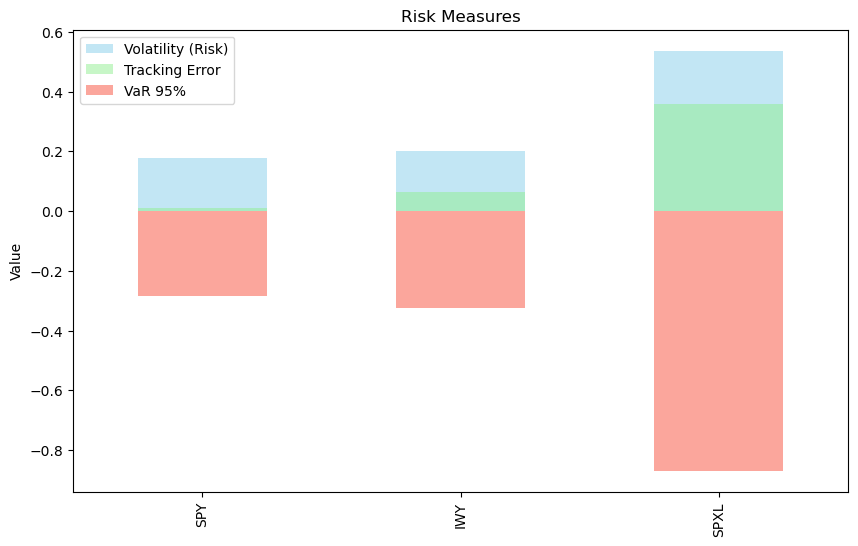

In [46]:
#Let us visualize the Risk Measures
fig, ax = plt.subplots(figsize=(10, 6))
volatility.plot(kind='bar', color='skyblue', label='Volatility (Risk)', alpha=0.5)
tracking_error.plot(kind='bar', color='lightgreen', label='Tracking Error', alpha=0.5)
VaR_95.plot(kind='bar', color='salmon', label='VaR 95%', alpha=0.7)
plt.title('Risk Measures')
plt.ylabel('Value')
plt.legend()
plt.show()

In [47]:
# Naturally, the SPXL is more risky that the other ETFs
mean = data.mean() * 252

print("Annualized Mean Returns:")
print(mean)

Annualized Mean Returns:
SPY     0.122495
IWY     0.164919
SPXL    0.213052
dtype: float64


In [48]:
# Risk Adjusted Returns
eff_ratio = mean/volatility

print("Risk Adjusted Returns:")
print(eff_ratio)

Risk Adjusted Returns:
SPY     0.692871
IWY     0.813744
SPXL    0.397119
dtype: float64


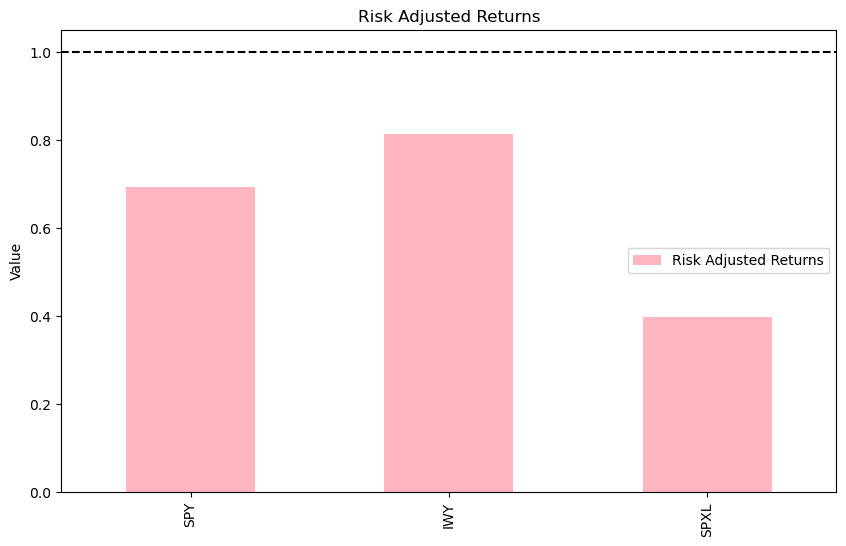

In [49]:
#Let us visualize
fig, ax = plt.subplots(figsize=(10, 6))
eff_ratio.plot(kind='bar', color='lightpink', label='Risk Adjusted Returns')
ax.axhline(y=1, color='black', linestyle='--')
plt.title('Risk Adjusted Returns')
plt.ylabel('Value')
plt.legend()
plt.show()

In [50]:
# Calculate the Risk Adjusted Returns of the Benchmark (Risk Aversion Coefficient)

mean_bench = benchmark_rets.mean() * 252

var_bench = benchmark_rets.var() * 252

eff_rate_bench = mean_bench/var_bench

eff_rate_bench

3.287196304710965